In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data loading and assembly

In [2]:
spectra = pd.read_csv('../data/dataset.csv')
columns = ['target', 'sampleID'] 
columns.extend([str(x) for x in range(950, 1530+1,2)])
spectra = spectra[columns]
print(spectra.shape)
spectra.head()

(698, 293)


,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,94.333333,0.0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,...,0.791820,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571
1,94.333333,0.0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,...,0.685869,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826
2,94.333333,0.0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,...,0.618997,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850
3,94.333333,0.0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,...,0.751016,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516
4,76.333333,1.0,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,...,1.001077,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842


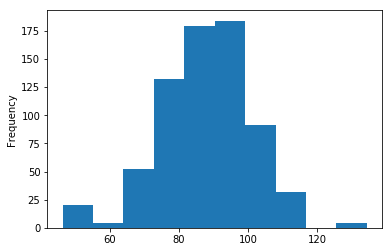

In [3]:
spectra['target'].plot.hist()
plt.show()

In [4]:
# dataset shape
spectra.shape

(698, 293)

# Dataset clean ?

In [5]:
spectra.describe()

,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,...,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,87.867001,88.361032,35.075930,34.089405,33.118207,32.248728,31.512126,30.961026,30.527884,30.184520,...,0.642378,0.717119,0.779950,0.821864,0.881985,0.945085,1.006667,1.069775,1.134070,1.199629
std,13.327779,51.000422,2.030035,2.060834,2.089150,2.111065,2.129829,2.145836,2.150767,2.153461,...,0.686442,0.693758,0.699668,0.704813,0.711064,0.717485,0.724458,0.731790,0.738503,0.745828
min,46.333333,0.000000,26.655676,25.505169,24.395685,23.420492,22.587944,21.945278,21.496870,21.147123,...,-1.764682,-1.726724,-1.690527,-1.660725,-1.626905,-1.592568,-1.559861,-1.527287,-1.488511,-1.451741
25%,80.000000,44.250000,34.081783,33.112638,32.129796,31.271699,30.559600,30.006750,29.585270,29.244950,...,0.238126,0.316725,0.373221,0.403003,0.462925,0.522936,0.587332,0.652647,0.715998,0.776902
50%,88.000000,88.000000,35.383537,34.404322,33.446087,32.584858,31.861850,31.307280,30.874285,30.531601,...,0.632675,0.710483,0.777476,0.820467,0.884216,0.946825,1.012075,1.078114,1.142786,1.210467
75%,96.000000,132.000000,36.358374,35.383751,34.438153,33.573155,32.844104,32.324157,31.889494,31.551481,...,1.084671,1.158659,1.218695,1.270178,1.330560,1.392627,1.460363,1.528732,1.594301,1.659343
max,134.333333,177.000000,42.143303,41.016056,39.927353,38.940678,38.071739,37.357346,36.864861,36.467106,...,2.929408,2.975907,3.031236,3.091215,3.146902,3.201092,3.255369,3.311751,3.375964,3.431573


In [6]:
spectra.isnull().sum().sum()

0

In [7]:
spectra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Columns: 293 entries, target to 1530
dtypes: float64(293)
memory usage: 1.6 MB


# Possible outliers cleaning

In [8]:
spectra = spectra[spectra['target'] >  70]
spectra = spectra[spectra['target'] < 105]
spectra.shape

(591, 293)

# Outlier cleaning within sample ID

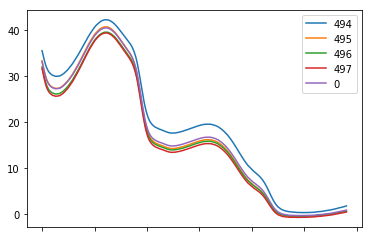

In [9]:
subset = spectra[spectra['sampleID'] == 125]
subset = subset.append(subset.mean(axis=0).to_frame().T, ignore_index=False)
subset[[str(x) for x in range(950, 1530+1,2)]].T.plot()

In [10]:
subsetcol = ['sampleID']
subsetcol.extend([str(x) for x in range(950, 1530+1,2)])
df = spectra[subsetcol]
df.head()

,sampleID,950,952,954,956,958,960,962,964,966,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,0.0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,31.536673,...,0.791820,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571
1,0.0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,31.159092,...,0.685869,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826
2,0.0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,30.235334,...,0.618997,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850
3,0.0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,30.029732,...,0.751016,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516
4,1.0,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,31.041756,...,1.001077,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842


In [11]:
cols = [str(x) for x in range(950, 1530+1,2)]
result = (df[cols]- df.groupby('sampleID').transform('mean').values) > df.groupby('sampleID').transform('std')*1.45
spectra[result.sum(axis=1) == 0].shape

(525, 293)

In [12]:
spectra = spectra[result.sum(axis=1) == 0]

In [13]:
spectra.shape

(525, 293)

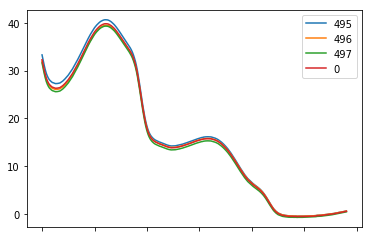

In [14]:
subset = spectra[spectra['sampleID'] == 125]
subset = subset.append(subset.mean(axis=0).to_frame().T, ignore_index=False)
subset[[str(x) for x in range(950, 1530+1,2)]].T.plot()

# Target description

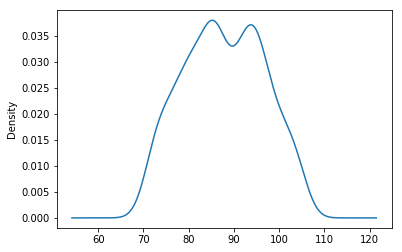

In [15]:
spectra['target'].plot.density()
plt.show()

In [16]:
# The closer to 0, the better
spectra['target'].skew()


0.0013473014665754187

# SampleID  aggregation

In [17]:
spectra[['target']].describe()

,target
count,525.000000
mean,87.808571
std,8.806655
min,71.000000
25%,80.666667
50%,87.000000
75%,94.666667
max,104.666667


OrderedDict([(0.0, 71.0), (0.25, 80.66666666666667), (0.5, 87.0), (0.75, 94.66666666666669), (1.0, 104.66666666666669)])


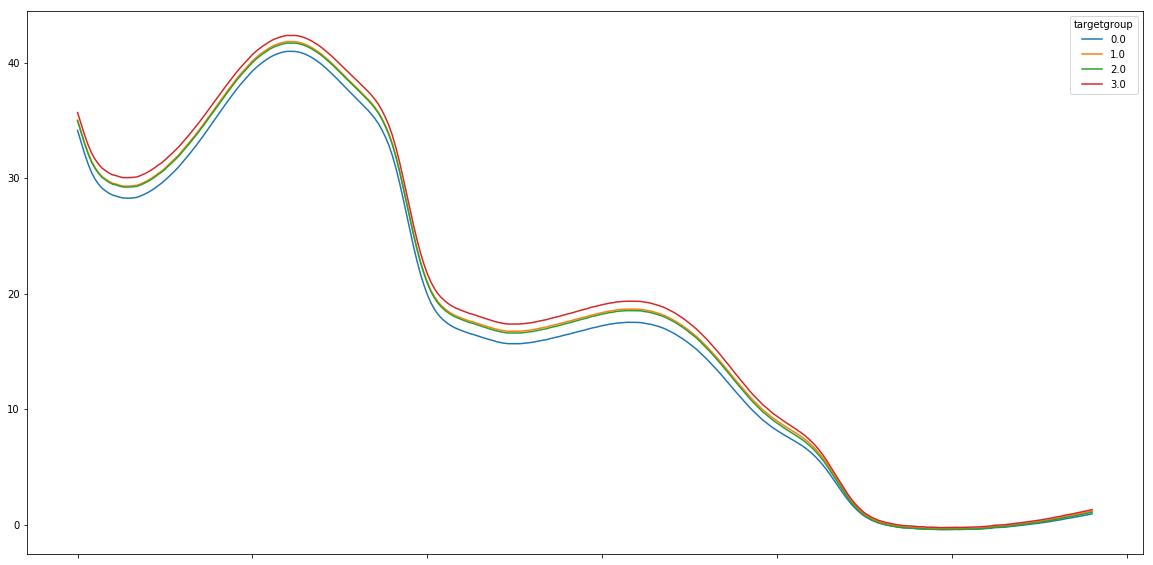

In [18]:
import collections
groupnumber = 4 +1
# defines quant group
quants = spectra['target'].quantile(np.linspace(0, 1, groupnumber)).to_dict()
print(collections.OrderedDict(sorted(quants.items())))
def quantplacement(entry):
    index = -1
    for key,value in collections.OrderedDict(sorted(quants.items())).items():
        if entry < value:
            return index
        index += 1
    #return index
        
spectra['targetgroup']=spectra['target'].apply(quantplacement)
spectra.drop(['target', 'sampleID'], axis=1).groupby('targetgroup').mean().T.plot(figsize=(20,10))
plt.show()


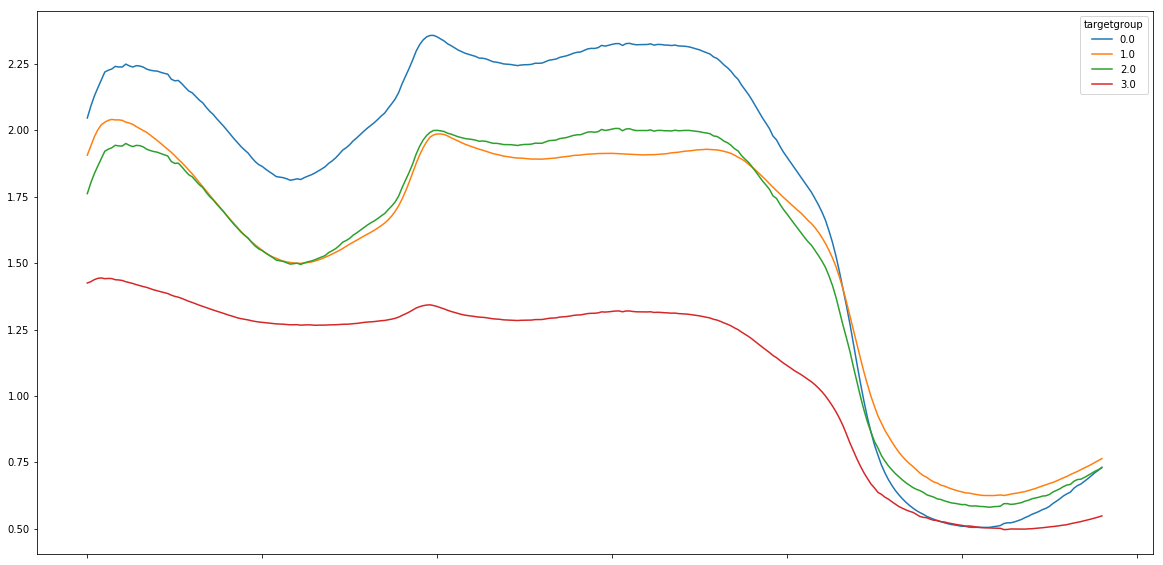

In [19]:
#Standard deviation
spectra.drop(['target', 'sampleID'], axis=1).groupby('targetgroup').std().T.plot(figsize=(20,10))
plt.show()

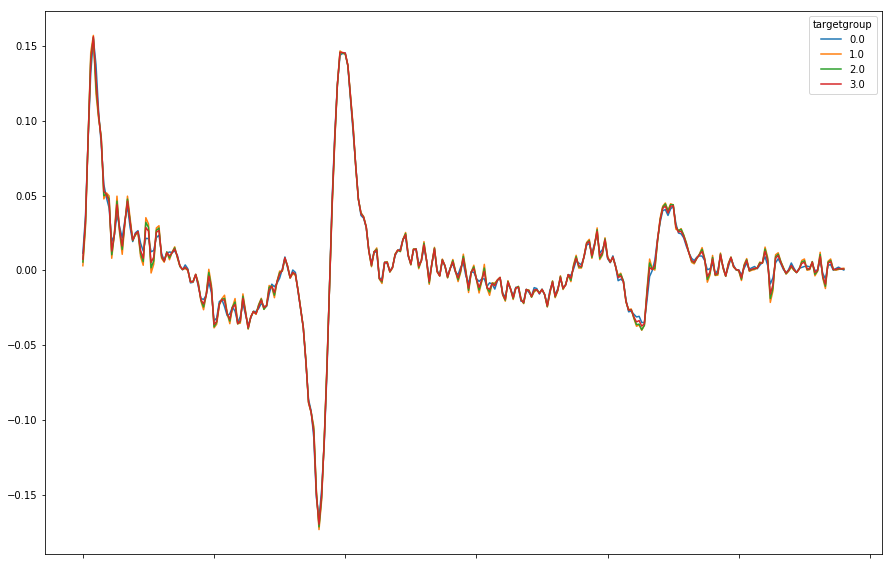

In [20]:
#spectra.groupby('targetgroup').mean()[[str(x) for x in range(950, 1530+1,2)]].T.plot()
colnames = [str(x) for x in range(950, 1530+1,2)]

def gradient2(entry):
    #print(entry)
    return np.gradient(np.gradient(entry))

subset = spectra[colnames].apply(gradient2, axis=1)
subset=pd.DataFrame(np.array(subset.tolist()).reshape(-1, len(colnames)), columns=colnames)
df = pd.concat((spectra[['targetgroup']], subset), axis=1)

df.groupby('targetgroup').mean().T.plot(figsize=(15,10))
plt.show()

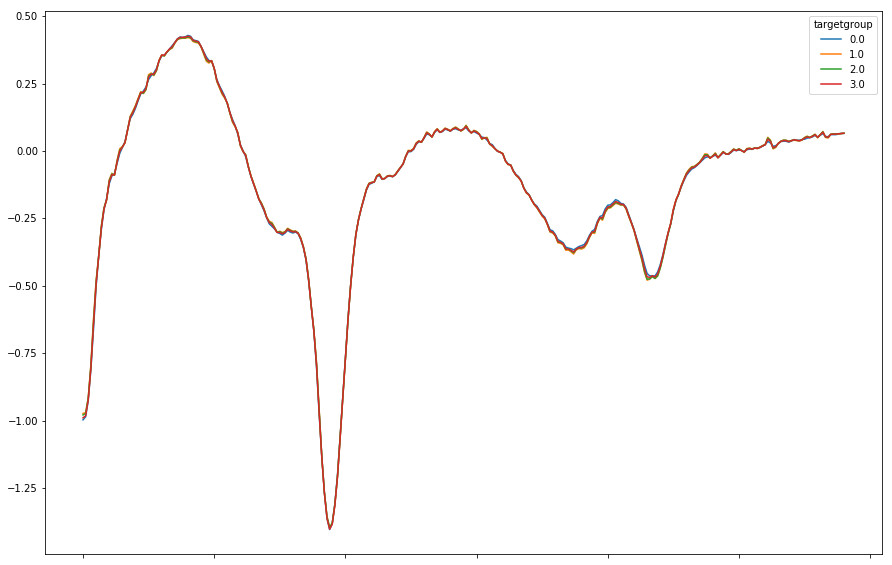

In [21]:
#spectra.groupby('targetgroup').mean()[[str(x) for x in range(950, 1530+1,2)]].T.plot()

colnames = [str(x) for x in range(950, 1530+1,2)]

def gradient(entry):
    #print(entry)
    return np.gradient(entry)

subset = spectra[[str(x) for x in range(950, 1530+1,2)]].apply(gradient, axis=1)
subset=pd.DataFrame(np.array(subset.tolist()).reshape(-1, len(colnames)), columns=colnames)
df = pd.concat((spectra[['targetgroup']], subset), axis=1)

df.groupby('targetgroup').mean().T.plot(figsize=(15,10))

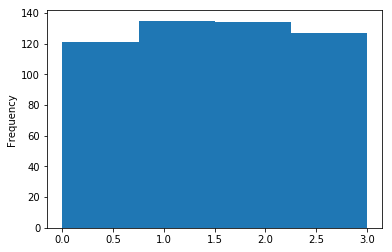

In [22]:
spectra['targetgroup'].plot.hist(bins = groupnumber-1)

# Regression

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union

## Folds definition

In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False, random_state=47)

## Savgol filter

https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter

In [25]:
from scipy.signal import savgol_filter

class Savgol(BaseEstimator, TransformerMixin):
    """Apply a lambda feature"""
    def __init__(self, window_length=5, polyorder=2, deriv=0, columns=[str(x) for x in range(950, 1530+1,2)]):
        self.window_length = window_length
        self.polyorder = polyorder
        self.deriv = deriv
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X[self.columns]
        toreturn = df.apply(lambda x:savgol_filter(x, window_length=self.window_length, polyorder=self.polyorder, deriv=self.deriv), axis=1)
        return pd.DataFrame(np.array(toreturn.tolist()).reshape(-1, len(colnames)), columns=colnames)

params={'window_length':5, 'polyorder':2, 'deriv':0}
savgol = Savgol(**params)
savgol.fit_transform(spectra).shape

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(525, 291)

## Blocs creation

In [26]:
params={'window_length':5, 'polyorder':2, 'deriv':1}
savgol = Savgol(**params)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
from sklearn.decomposition import PCA
pca = PCA()

# Tree construction

In [29]:
lrpipelist1 = [('savgol', savgol), ('scaler', scaler), ('pca', pca)] #
pipe1 = Pipeline(lrpipelist1)
#Xtrans = pipe1.fit_transform(spectra)#.shape

In [30]:
pipe1.fit_transform(spectra).shape

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(525, 291)

In [31]:
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(random_state=0, max_iter=10000)

In [32]:
listpipereg = [('pipe1', pipe1), ('elnet', elnet)] #
pipereg = Pipeline(listpipereg)

In [33]:
pipereg.fit(spectra, spectra['target'])

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Pipeline(memory=None,
     steps=[('pipe1', Pipeline(memory=None,
     steps=[('savgol', Savgol(columns=['950', '952', '954', '956', '958', '960', '962', '964', '966', '968', '970', '972', '974', '976', '978', '980', '982', '984', '986', '988', '990', '992', '994', '996', '998', '1000', '1002', '1004', '1006', '1008', '1010',...e=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False))])

# PCA visualisation

In [34]:

Xtrans = pipe1.fit_transform(spectra)
Xtrans.shape

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(525, 291)

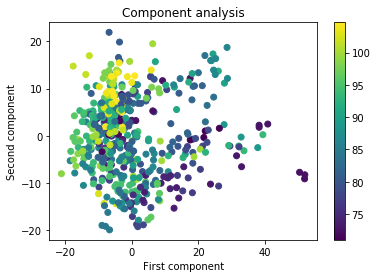

In [35]:
plt.scatter(Xtrans[:, 0], Xtrans[:, 1], c=spectra['target'])
# Axis
#plt.plot([-40, 40], [0, 0], color='black', ls='--')
#plt.plot([0, 0], [-14, 14], color='black', ls='--')
# Title
plt.title('Component analysis')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.colorbar()
plt.show()

### HyperOpt

In [35]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [37]:
pipe1.set_params(savgol__window_length=7)

Pipeline(memory=None,
     steps=[('savgol', Savgol(columns=['950', '952', '954', '956', '958', '960', '962', '964', '966', '968', '970', '972', '974', '976', '978', '980', '982', '984', '986', '988', '990', '992', '994', '996', '998', '1000', '1002', '1004', '1006', '1008', '1010', '1012', '1014', '1016', '1018', '1020', '10...ed_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [75]:
counter = 0
bestscore = 1e20

pipe1.set_params(savgol__window_length=9)
Xtrans = pipe1.fit_transform(spectra)

def objective(params):
    global counter
    global bestscore
    counter += 1
    hyperparams = {
        'alpha': params['alpha'],
        'l1_ratio': params['l1_ratio'],
        'random_state': 0,
        #'max_iter':10000,
        }
    

    
    #print(hyperparams)
    #if 'window_length' in params.keys():
    #    pipe1.set_params(savgol__window_length=params['window_length'])
    #    Xtrans = pipe1.fit_transform(spectra)
    
    elnet = ElasticNet(**hyperparams)
    
    preds = cross_val_predict(elnet, Xtrans, spectra['target'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , preds)
    
    
    #score = -cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    if counter % 20 == 0:
        print("{} - RMSECV {}".format(counter, score**.5))
    if score < bestscore:
        bestscore = score
        print("{} - RMSECV {} - {}".format(counter, score**.5, params))
    return score

space = {
    'alpha': hp.loguniform('alpha', -6, 2),
    'l1_ratio': hp.loguniform('l1_ratio',-3, 0),
    #'window_length': hp.choice('window_length',[3, 5, 7, 9, 11]),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300)

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


1 - RMSECV 5.271815481254672 - {'alpha': 0.06816888982911133, 'l1_ratio': 0.20820300310321674}
2 - RMSECV 5.136136376852404 - {'alpha': 0.0065404478826869335, 'l1_ratio': 0.1340225299212126}
20 - RMSECV 5.267761299575501
21 - RMSECV 5.121102687040338 - {'alpha': 0.013149278933408563, 'l1_ratio': 0.10870040381974184}
30 - RMSECV 5.119738271728195 - {'alpha': 0.010166981993991405, 'l1_ratio': 0.14343976461926475}
36 - RMSECV 5.1101949205595085 - {'alpha': 0.009437044640699227, 'l1_ratio': 0.5766864895209507}
39 - RMSECV 5.107662394842599 - {'alpha': 0.02676619427505973, 'l1_ratio': 0.5607030164556785}
40 - RMSECV 5.1043218203686695
40 - RMSECV 5.1043218203686695 - {'alpha': 0.026088417437319874, 'l1_ratio': 0.5782458450529276}
41 - RMSECV 5.1030784753086165 - {'alpha': 0.024950428574240846, 'l1_ratio': 0.5700753920526983}
60 - RMSECV 6.128794022259694
62 - RMSECV 5.089236983367583 - {'alpha': 0.013704654919820404, 'l1_ratio': 0.6648639420922654}
63 - RMSECV 5.087474670700736 - {'alpha': 

In [76]:
params = {
        'alpha': best['alpha'],
        'l1_ratio': best['l1_ratio'],
        'random_state': 0,
        #'max_iter':10000,
        }
params# = {'alpha': 0.022626840092454328, 'l1_ratio': 0.9196431823524235, 'random_state': 0, 'max_iter': 10000}

{'alpha': 0.022626840092454328,
 'l1_ratio': 0.9196431823524235,
 'random_state': 0}

In [77]:
elnet = ElasticNet(**params)

preds = cross_val_predict(elnet, Xtrans, spectra['target'], cv=kf)
mean_squared_error(preds, spectra['target'])

25.772749230475018

In [78]:
mean_squared_error(preds, spectra['target'])**.5

5.076686835966448

## Coeff verification

In [83]:
elnet.fit(Xtrans,spectra['target'])
elnet.coef_[:20]

array([-0.25816456,  0.22214592, -0.41393955,  0.54503612, -0.33287936,
        0.4005942 , -0.78599166,  0.87600486,  1.59923044,  2.98535616,
        0.52809186,  4.81400126, -0.3043889 , -2.41456536,  2.09437549,
        4.66071584,  1.61326406,  1.83123252, -0.        ,  0.        ])

In [84]:
elnet.coef_.max()

5.987969250380966

In [85]:
elnet.coef_.min()

-4.780348711105004

## Score accuracy

In [86]:
df = pd.DataFrame({'target':spectra['target'], 'pred':preds, 'targetgroup':spectra['targetgroup'], 'sampleID':spectra['sampleID'],}) #
df.head()

,target,pred,targetgroup,sampleID
0,94.333333,99.148303,2.0,0.0
1,94.333333,102.331661,2.0,0.0
2,94.333333,102.265589,2.0,0.0
3,94.333333,102.130600,2.0,0.0
5,76.333333,82.304112,0.0,1.0


In [87]:
df['delta'] = df['target'] - df['pred']
df['deltaabs'] = np.abs(df['delta'])
df.head()

,target,pred,targetgroup,sampleID,delta,deltaabs
0,94.333333,99.148303,2.0,0.0,-4.814970,4.814970
1,94.333333,102.331661,2.0,0.0,-7.998328,7.998328
2,94.333333,102.265589,2.0,0.0,-7.932255,7.932255
3,94.333333,102.130600,2.0,0.0,-7.797267,7.797267
5,76.333333,82.304112,0.0,1.0,-5.970778,5.970778


In [88]:
samplesize = df.shape[0]
print('sample size:', samplesize)

for errorabs in [1 ,2 ,3 ,4 ,6 ,8, 10]:
    correctcount = df[df['deltaabs'] < errorabs].shape[0]
    percent = correctcount/samplesize
    print('prediction +/- {:.1f} : percent {:05.02f} %'.format(errorabs, percent*100))

sample size: 525
prediction +/- 1.0 : percent 16.00 %
prediction +/- 2.0 : percent 28.57 %
prediction +/- 3.0 : percent 41.71 %
prediction +/- 4.0 : percent 56.95 %
prediction +/- 6.0 : percent 74.29 %
prediction +/- 8.0 : percent 88.38 %
prediction +/- 10.0 : percent 95.81 %


In [89]:
df[['delta']].describe()

,delta
count,525.000000
mean,0.156200
std,5.079123
min,-12.252492
25%,-3.316263
50%,0.217426
75%,3.744045
max,13.543065


In [90]:
import seaborn as sns

/Users/cricket/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


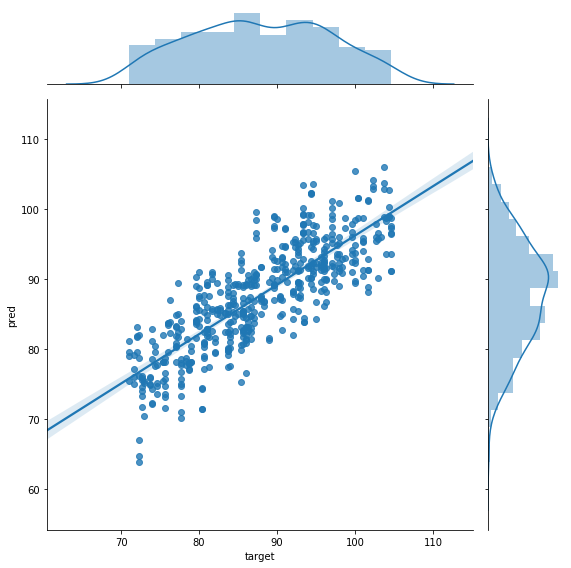

In [91]:

sns.jointplot(x='target', y='pred', data=df, kind='reg', size=8, stat_func=None)
plt.show()

/Users/cricket/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


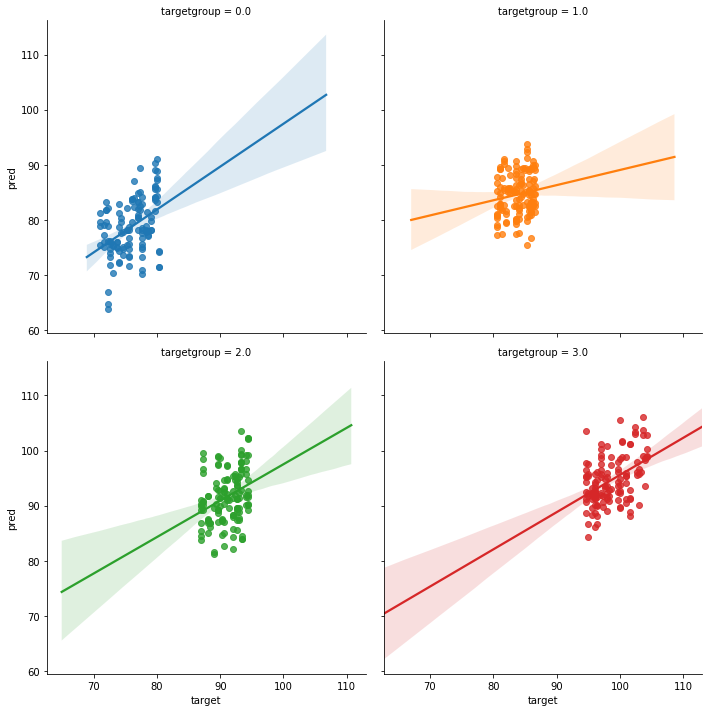

In [92]:
sns.lmplot(x='target',
           y='pred',
           col='targetgroup',
           hue='targetgroup',
           data=df,
           aspect=1,
           col_wrap=2,
           size=5,
           legend=True)
plt.show()

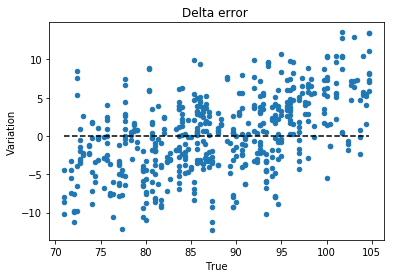

,delta
count,525.000000
mean,0.156200
std,5.079123
min,-12.252492
25%,-3.316263
50%,0.217426
75%,3.744045
max,13.543065


In [93]:

df.plot.scatter('target', 'delta')
plt.plot([df['target'].min(), df['target'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error ')
plt.xlabel('True')
plt.ylabel('Variation')
plt.show()
df[['delta']].describe()

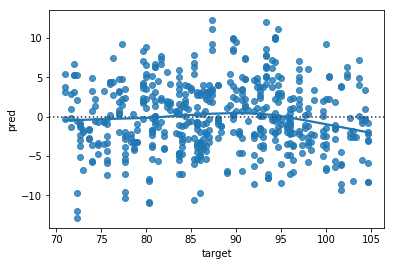

In [94]:
sns.residplot(x='target', y='pred', data=df, lowess=True)

In [38]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge()

In [37]:
from sklearn.svm import SVR
svr = SVR()

In [38]:
counter = 0
bestscore = 1e20

pipe1.set_params(savgol__window_length=9)
Xtrans = pipe1.fit_transform(spectra)



def objective(params):
    global counter
    global bestscore
    counter += 1
    hyperparams = {
        #'gamma': params['gamma'],
        #'alpha': params['alpha'],
        #'kernel': params['kernel'],
        #'degree': params['degree'],
        'C':params['C'],
        'epsilon':params['epsilon'],
        }
    
    #print(hyperparams)
    
    #krr = KernelRidge(**hyperparams)
    svr = SVR(**hyperparams)
    
    preds = cross_val_predict(svr, Xtrans, spectra['target'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , preds)
    
    #score = -cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    
    if counter % 10 == 0:
        print("{} - RMSE {}".format(counter, score**.5))
    if score < bestscore:
        bestscore = score
        print("{} - RMSECV {} - {}".format(counter, score**.5, hyperparams))
    return score

space = {
    #'gamma': hp.loguniform('gamma', -2, 1),
    #'alpha': hp.loguniform('alpha',-3, 0),
    #'kernel':hp.choice('kernel', ['poly']), #
    #'degree':hp.choice('degree', [2]),
    'C': hp.loguniform('C', -2, 1),
    'epsilon': hp.loguniform('epsilon', -2, 1),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=200)

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


1 - RMSECV 8.14926486855472 - {'C': 0.26102887133612546, 'epsilon': 1.1695957546806401}
2 - RMSECV 7.503168175207283 - {'C': 1.3550995055302177, 'epsilon': 0.1697240004219966}
4 - RMSECV 7.351146370273733 - {'C': 2.175789538307768, 'epsilon': 1.1038936966285924}
10 - RMSE 7.340164786373373
10 - RMSECV 7.340164786373373 - {'C': 2.261792615230339, 'epsilon': 0.50843807866056}
20 - RMSE 8.32204061268592
22 - RMSECV 7.291646583763793 - {'C': 2.5451250632699414, 'epsilon': 0.7847969270682309}
25 - RMSECV 7.276712847396228 - {'C': 2.6347664172571883, 'epsilon': 0.8332111659925905}
26 - RMSECV 7.2689796906753115 - {'C': 2.6881231790839983, 'epsilon': 0.7942923577735269}
30 - RMSE 7.269931272465081
40 - RMSE 7.273594301420911
50 - RMSE 7.702703806008779
60 - RMSE 7.421555870403637
67 - RMSECV 7.265823051767899 - {'C': 2.7053134954857843, 'epsilon': 0.7645149535889484}
70 - RMSE 7.471768920397079
80 - RMSE 7.467742615521035
90 - RMSE 7.477139315396959
100 - RMSE 8.070221746013774
110 - RMSE 7.7